# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [128]:
amdc.disconnect()
from Cabinet_Test import cmd
import sys
sys.path.append(r'..\AMDC-Firmware\scripts')
from AMDC import AMDC
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)
Vdc = 30
cmd = cmd(Vdc, amdc, debug = False) 


	> cabinet setup 30.00000
['cabinet setup 30.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cb', 'FAILURE']


In [129]:
 
cmd.BIM_init()
cmd.BIM_set_Vdc(30)
cmd.BIM_enable_ctrl()
cmd.BIM_enable_vctrl()
#cmd.BIM_enable_levctrl()
cmd.enable_pwm()
cmd.twin_enable_log()


	> BIM init
['BIM initENC:\tSetting pulses per rev bits = 10...', '', 'SUCCESS']
	> BIM set_vdc 30.000000
['BIM set_vdc 30.000000', 'SUCCESS']
	> BIM enable_ctrl
['BIM enable_ctrl', 'SUCCESS']
	> BIM enable_vctrl
['BIM enable_vctrl', 'SUCCESS']
	> hw pwm on
['hw pwm on', 'SUCCESS']
	> twin enable_log
['twin enable_log', 'SUCCESS']


In [126]:
cmd.BIM_set_w(10)

	> BIM set_w 10.000000
['BIM set_w 10.000000', 'SUCCESS']


In [125]:
cmd.BIM_set_id(5.0)


	> BIM set_id 5.000000
['BIM set_id 5.000000', 'SUCCESS']


In [127]:
cmd.disable_pwm()

	> hw pwm off
['hw pwm off', 'SUCCESS']


In [32]:
amdc.disconnect()

## Logging


In [64]:
import matplotlib

In [43]:
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile

In [ ]:
amdc.connect()

In [44]:
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()

	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:



In [45]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
logger.register('theta_rm_mes wrm_mes', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

	> log reg 0 LOG_theta_rm_mes 1230104 1000 double
['log reg 0 LOG_theta_rm_mes 1230104 1000 double', 'SUCCESS']
	> log reg 1 LOG_wrm_mes 1230096 1000 double
['log reg 1 LOG_wrm_mes 1230096 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_theta_rm_mes       0            double              1000.0                0       
LOG_wrm_mes           1            double              1000.0                0       



In [52]:
####################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()


	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']


In [53]:

# DATA IS BEING RECORDED
#time.sleep(10)

logger.stop()

	> log stop
['log stop', 'SUCCESS']


	> log dump bin 0
Dumping: LOG_theta_rm_mes
Dump took: 3.948  sec
Dump rate: 1876.341  sps
Num samples: 7408 

	> log dump bin 1
Dumping: LOG_wrm_mes
Dump took: 4.030  sec
Dump rate: 1838.420  sps
Num samples: 7408 



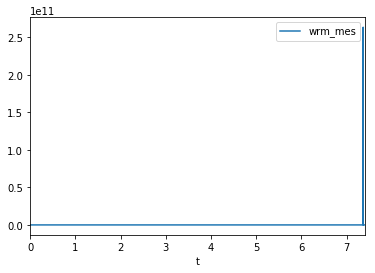

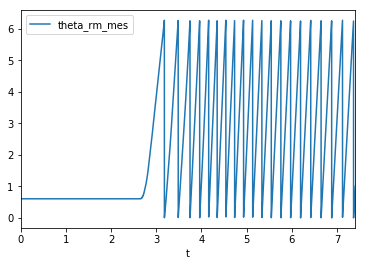

In [54]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data.csv')
#data
data.filter(regex="^wrm_mes$").plot()
data.filter(regex="^theta_rm_mes$").plot()

In [ ]:
data.filter(regex="^Ib1_a|Ib1_b|Ib1_c$").plot()

In [ ]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

In [ ]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

In [ ]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
#time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

In [ ]:
cmd.init_twin_ctrl()


In [ ]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

In [ ]:
cmd.twin_set_trq(0,0)
cmd.twin_set_s1(0,0)
cmd.twin_set_s2(0,0)

In [ ]:

logger.unregister_all()
#logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q Is1_d_ref Is1_q_ref Is1_d Is1_q Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')
logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q', samples_per_sec = 1000, var_type = 'double')
# View which variables are logged
logger.info()

logger.clear_all()
logger.start()
time.sleep(1)
logger.stop()

ata = logger.dump(file = 'BIM_data.csv')
data
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d$|Itq_q").plot()

In [ ]:

data = logger.dump(file = 'BIM_data.csv')
data


In [ ]:
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d$|Itq_q").plot()
#data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()
#data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
#data = logger.dump(file = 'test_data.csv')
#data
data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:

logger.unregister_all()
logger.register('v_tq_d v_tq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^v_tq_d|v_tq_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('we_tq', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^we_tq$").plot()